In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv("loan_approval_data.csv")
data.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [4]:
data.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [5]:
data.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


#  Handle missing values

In [6]:

categorical_columns = data.select_dtypes(include=["object"]).columns

In [7]:
categorical_columns

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [8]:
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
# numerical_columns = data.select_dtypes(include=["number"]).columns  -- will give same output
numerical_columns

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [9]:
categorical_columns.size + numerical_columns.size

20

In [10]:
data.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [11]:
#  imputer to fill numerical values 

from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy="mean")
data[numerical_columns] = num_imp.fit_transform(data[numerical_columns])

data.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [12]:
data["Loan_Term"].mean()

np.float64(48.0)

In [13]:
categorical_imputer = SimpleImputer(strategy="most_frequent")
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

data.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [14]:
data.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

#  Exploratory Data Analysis

Text(0.5, 1.0, 'Is Loan approved or not')

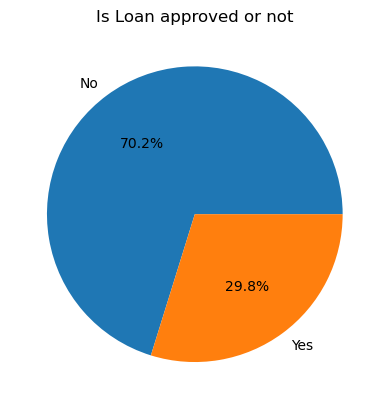

In [15]:
# how balanced our classes are ?
classes_count = data["Loan_Approved"].value_counts()

plt.pie(classes_count, labels=["No","Yes"], autopct="%1.1f%%")
plt.title("Is Loan approved or not")

[Text(0, 0, '621'), Text(0, 0, '379')]

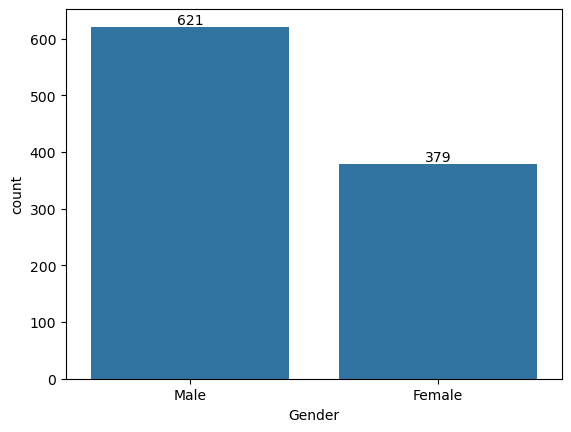

In [16]:
gender_count = data["Gender"].value_counts()
ax = sns.barplot(gender_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '722'), Text(0, 0, '278')]

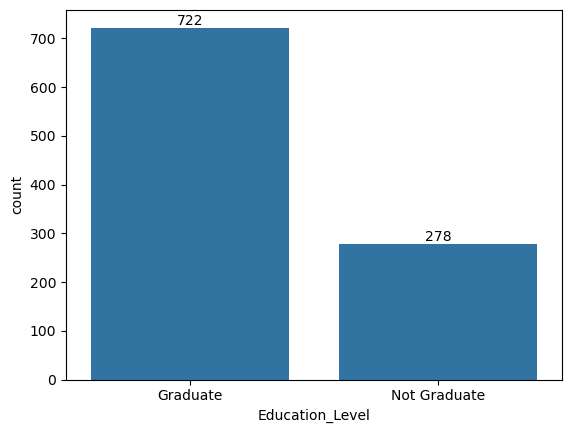

In [17]:
education_count = data["Education_Level"].value_counts()
ax = sns.barplot(education_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

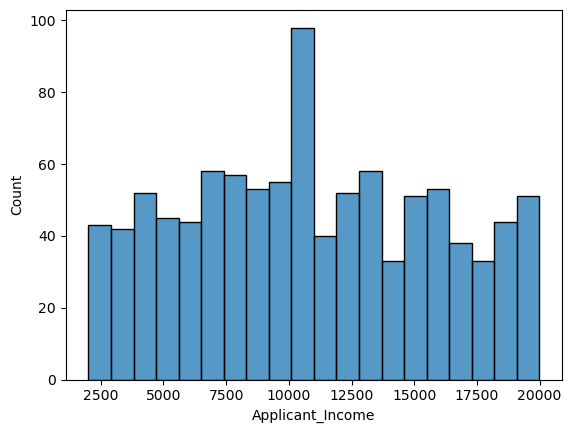

In [18]:
#  Analyze income 

sns.histplot(
    data = data,
    x = "Applicant_Income",
    bins = 20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

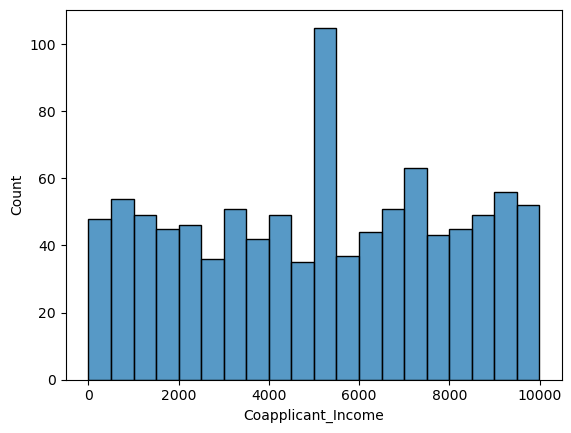

In [19]:
sns.histplot(
    data = data,
    x = "Coapplicant_Income",
    bins = 20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

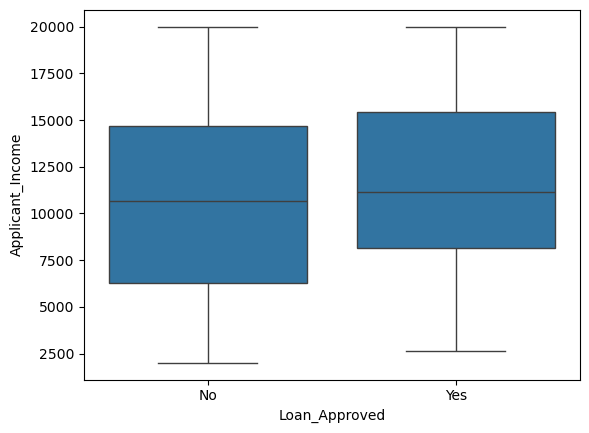

In [20]:
#  Outlier Detection - Box Plots 

sns.boxplot(
    data = data,
    x = "Loan_Approved",
    y = "Applicant_Income"
)


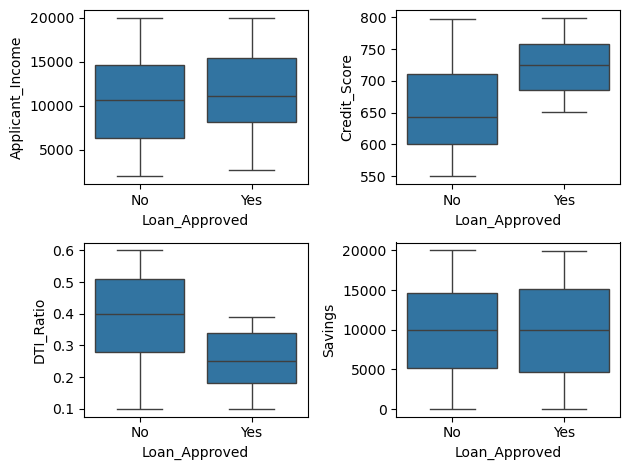

In [21]:
fig, axes = plt.subplots(2,2)

sns.boxplot(ax = axes[0,0], data = data, x = "Loan_Approved", y = "Applicant_Income")
sns.boxplot(ax = axes[0,1], data = data, x = "Loan_Approved", y = "Credit_Score")
sns.boxplot(ax = axes[1,0], data = data, x = "Loan_Approved", y = "DTI_Ratio")
sns.boxplot(ax = axes[1,1], data = data, x = "Loan_Approved", y = "Savings")

plt.tight_layout()

<Axes: xlabel='Loan_Approved', ylabel='Age'>

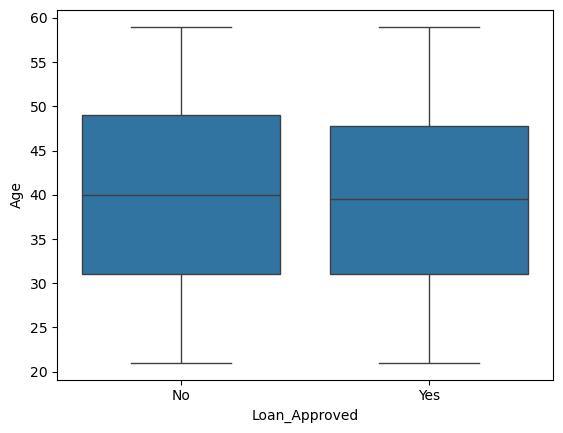

In [22]:
sns.boxplot(data = data, x = "Loan_Approved", y = "Age")

<Axes: xlabel='Loan_Approved', ylabel='Loan_Amount'>

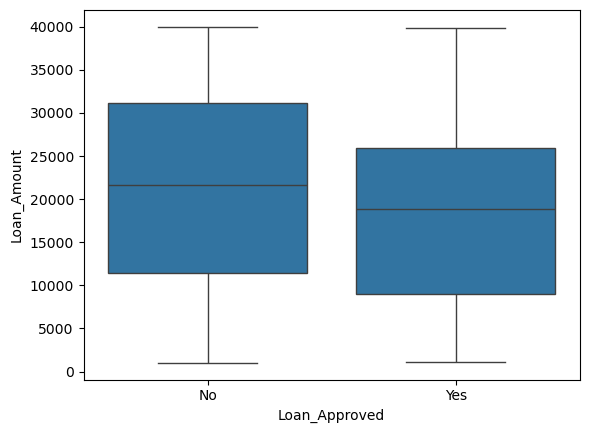

In [23]:
sns.boxplot(data = data, x = "Loan_Approved", y = "Loan_Amount")

<Axes: xlabel='Credit_Score', ylabel='Count'>

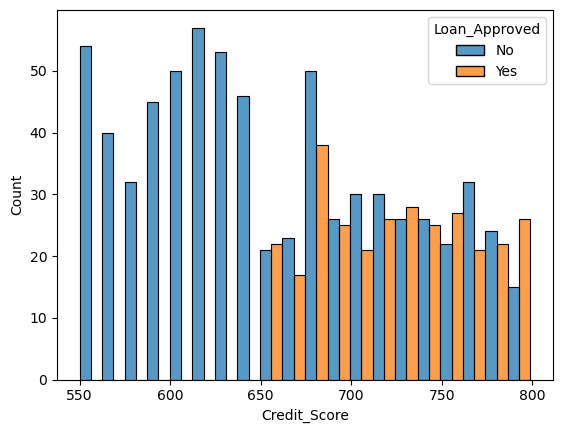

In [24]:
# Credit score with loan approved 

sns.histplot(
    data = data,
    x = "Credit_Score",
    bins = 20,
    hue = "Loan_Approved",
    multiple="dodge"
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

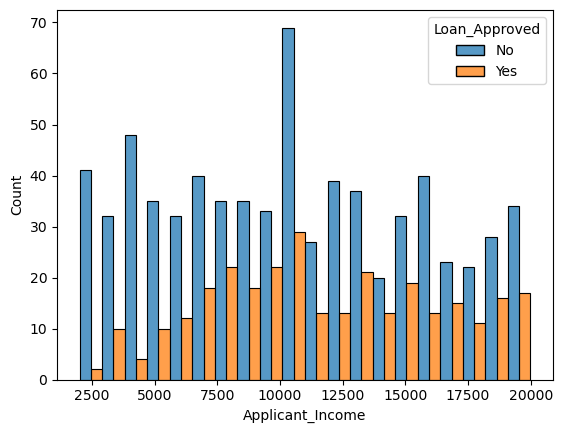

In [25]:
#  Applicant income with loan approved

sns.histplot(
    data = data,
    x = "Applicant_Income",
    bins = 20,
    hue = "Loan_Approved",
    multiple="dodge"
)

In [26]:
#  Remove Applicant ID - because applicant id is specific to bank and unnecessary feature for our analysis 

data = data.drop("Applicant_ID", axis = 1)
data.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


# Encoding

In [27]:
data.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
data.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Employment_Status', 'Age',
       'Marital_Status', 'Dependents', 'Credit_Score', 'Existing_Loans',
       'DTI_Ratio', 'Savings', 'Collateral_Value', 'Loan_Amount', 'Loan_Term',
       'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender',
       'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [30]:
#  Label Encoder 

le = LabelEncoder()
data["Education_Level"] = le.fit_transform(data["Education_Level"])
data["Loan_Approved"] = le.fit_transform(data["Loan_Approved"])

In [31]:
data.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [32]:
#  One hot encoding 

cols = ["Gender","Marital_Status","Loan_Purpose","Property_Area","Employment_Status","Employer_Category"]
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

encoded = ohe.fit_transform(data[cols])



In [33]:
ohe.get_feature_names_out(cols)

array(['Gender_Male', 'Marital_Status_Single', 'Loan_Purpose_Car',
       'Loan_Purpose_Education', 'Loan_Purpose_Home',
       'Loan_Purpose_Personal', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Employment_Status_Salaried',
       'Employment_Status_Self-employed', 'Employment_Status_Unemployed',
       'Employer_Category_Government', 'Employer_Category_MNC',
       'Employer_Category_Private', 'Employer_Category_Unemployed'],
      dtype=object)

In [34]:
encoded_df = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(cols), index = data.index)

data = pd.concat([data.drop(columns=cols), encoded_df], axis = 1)
data.head()


,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

#  Correlation Heatmap

In [36]:
num_cols = data.select_dtypes(include="number")
corr_matrix = num_cols.corr()

In [37]:
corr_matrix

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
Applicant_Income,1.000000,0.007545,-0.023988,-0.026658,-0.009818,-0.010457,-0.009107,-0.028358,0.018789,-0.024143,...,-0.031234,0.004845,-0.036260,-0.000863,0.005609,0.001419,-0.025011,0.102589,-0.044639,-0.011995
Coapplicant_Income,0.007545,1.000000,0.014306,-0.026733,0.058423,0.012418,0.058078,-0.015047,0.009457,0.001596,...,0.059549,-0.010058,0.030045,-0.013517,-0.010462,0.023114,-0.001146,0.037640,0.004312,-0.047929
Age,-0.023988,0.014306,1.000000,-0.018767,-0.004212,0.023330,0.007903,-0.000986,0.037382,0.013502,...,0.037293,0.003100,-0.025661,-0.000167,-0.011743,-0.009866,-0.066041,0.021232,-0.012960,0.072462
Dependents,-0.026658,-0.026733,-0.018767,1.000000,-0.007687,-0.026338,0.011498,-0.004981,0.023004,-0.017409,...,-0.005785,-0.032278,0.024082,-0.034611,0.079136,0.000396,-0.009250,-0.018757,0.030197,-0.054147
Credit_Score,-0.009818,0.058423,-0.004212,-0.007687,1.000000,-0.007130,0.002338,-0.065353,0.007865,0.001002,...,0.015324,-0.006946,0.004445,-0.016627,-0.035896,-0.008344,-0.007076,0.066736,-0.000049,-0.046087
Existing_Loans,-0.010457,0.012418,0.023330,-0.026338,-0.007130,1.000000,0.047008,0.034435,-0.049916,-0.021035,...,0.023212,-0.053971,0.035629,-0.004462,0.042772,-0.012356,-0.009642,0.030520,-0.019306,0.045391
DTI_Ratio,-0.009107,0.058078,0.007903,0.011498,0.002338,0.047008,1.000000,0.004663,-0.009622,0.075784,...,-0.036648,0.044898,-0.006156,0.031658,-0.043904,0.022318,-0.007214,0.002090,-0.003506,0.026018
Savings,-0.028358,-0.015047,-0.000986,-0.004981,-0.065353,0.034435,0.004663,1.000000,0.015481,-0.012208,...,-0.028948,0.005438,0.016833,0.022435,0.000668,0.006304,-0.011683,0.004381,-0.030208,0.027178
Collateral_Value,0.018789,0.009457,0.037382,0.023004,0.007865,-0.049916,-0.009622,0.015481,1.000000,0.002660,...,-0.007120,0.020061,0.007975,-0.019882,0.000119,-0.041632,0.035760,-0.013464,-0.014480,-0.009655
Loan_Amount,-0.024143,0.001596,0.013502,-0.017409,0.001002,-0.021035,0.075784,-0.012208,0.002660,1.000000,...,0.032498,0.040206,-0.050076,-0.003266,-0.072972,-0.007407,0.013108,-0.025975,0.013923,-0.026566


In [38]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

<Axes: >

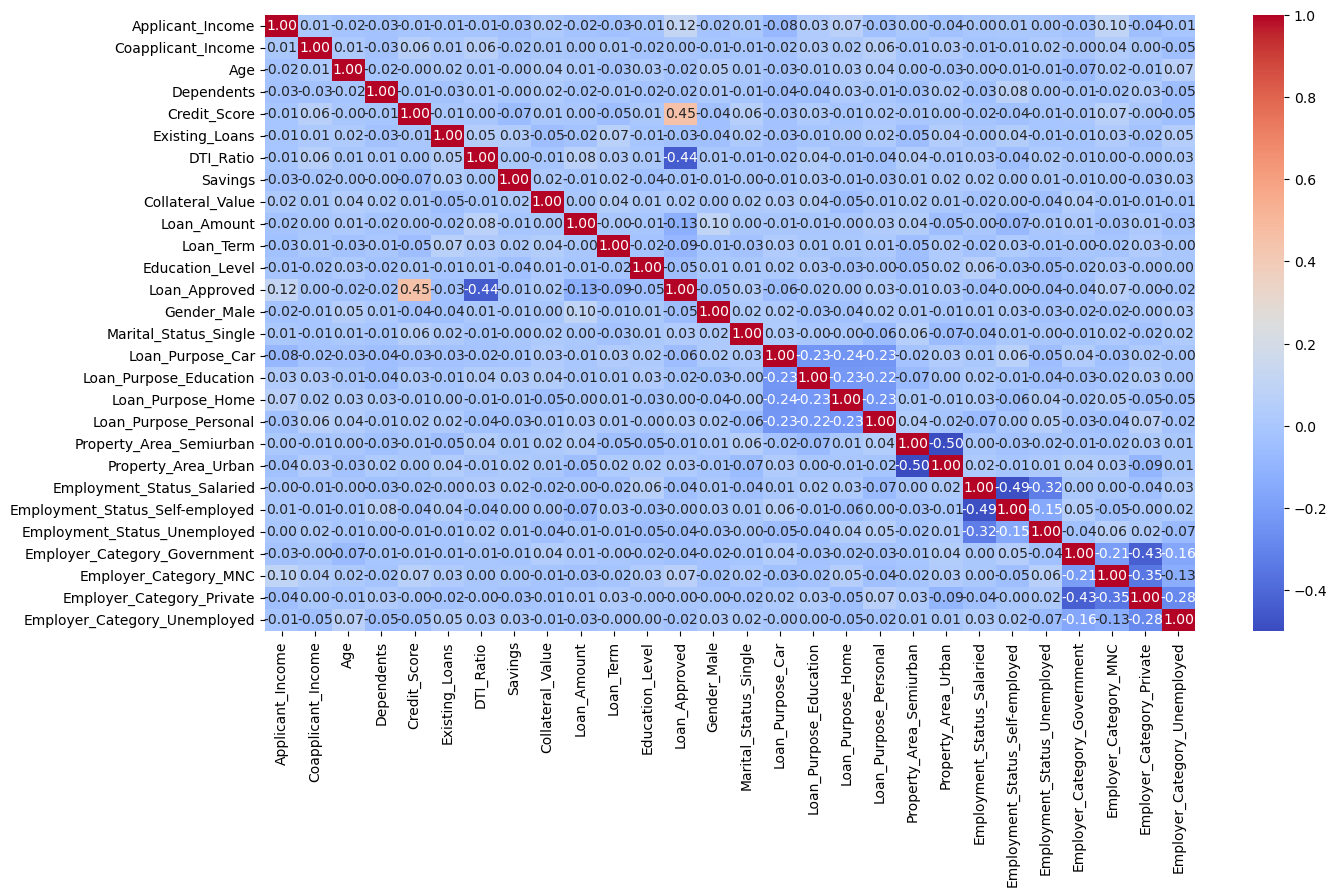

In [39]:
# correlation heatmap 

plt.figure(figsize=(15,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

#  Train Test Splitting + Feature Scaling 

In [40]:
X = data.drop("Loan_Approved", axis = 1)
y = data["Loan_Approved"]

X.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [41]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Loan_Approved, dtype: int64

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
X_test.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
521,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.0,22947.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
737,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.0,20522.825263,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
740,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.0,5876.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
660,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.0,8433.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
411,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.0,33926.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [46]:
X_test_scaled

array([[ 0.42610546,  0.55091079,  1.19037073, ..., -0.41388776,
         1.16316   , -0.30723158],
       [ 1.00971366,  0.58995935,  0.18392964, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.67557096, -0.54558674,  1.09887608, ..., -0.41388776,
         1.16316   , -0.30723158],
       ...,
       [-0.67980585, -0.10106072,  1.28186537, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.37650705, -0.97825874, -0.54802752, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [-0.73647272, -1.24497436,  0.73289751, ..., -0.41388776,
         1.16316   , -0.30723158]])

# Train and Evaluate Models 

In [47]:
#  Logistic Regression


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


log_model = LogisticRegression()
log_model.fit(X_train_scaled, Y_train)

y_pred = log_model.predict(X_test_scaled)

#  Evaluation 
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1 Score: ", f1_score(Y_test, y_pred))
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(Y_test, y_pred))

Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 Score:  0.7768595041322314
Accuracy:  0.865
Confusion Matrix:  [[126  13]
 [ 14  47]]


In [56]:
#  KNN 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, Y_train)

y_pred = knn_model.predict(X_test_scaled)

#  Evaluation 
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1 Score: ", f1_score(Y_test, y_pred))
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(Y_test, y_pred))

Precision:  0.62
Recall:  0.5081967213114754
F1 Score:  0.5585585585585585
Accuracy:  0.755
Confusion Matrix:  [[120  19]
 [ 30  31]]


In [57]:
#  Naive Bayes  


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

y_pred = nb_model.predict(X_test_scaled)

#  Evaluation 
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1 Score: ", f1_score(Y_test, y_pred))
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(Y_test, y_pred))

Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 Score:  0.7768595041322314
Accuracy:  0.865
Confusion Matrix:  [[126  13]
 [ 14  47]]


#  Best model on the basis of precision - Naive Bayes 

#  Feature Engineering 

In [58]:
data["DTI_Ratio_sq"] = data["DTI_Ratio"] ** 2
data["Credit_Score_sq"] = data["Credit_Score"] ** 2

# data["Applicant_Income_log"] = np.log1p(data["Applicant_Income"])
X = data.drop(columns = ["Loan_Approved", "DTI_Ratio", "Credit_Score"])
y = data["Loan_Approved"]

In [59]:
#  Train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scaling 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [60]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Property_Area_Urban,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0441,376996.000000
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0484,341056.000000
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187


In [61]:
#  Logistic Regression


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


log_model = LogisticRegression()
log_model.fit(X_train_scaled, Y_train)

y_pred = log_model.predict(X_test_scaled)

#  Evaluation 
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1 Score: ", f1_score(Y_test, y_pred))
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(Y_test, y_pred))

Precision:  0.7903225806451613
Recall:  0.8032786885245902
F1 Score:  0.7967479674796748
Accuracy:  0.875
Confusion Matrix:  [[126  13]
 [ 12  49]]


In [62]:
#  KNN 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, Y_train)

y_pred = knn_model.predict(X_test_scaled)

#  Evaluation 
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1 Score: ", f1_score(Y_test, y_pred))
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(Y_test, y_pred))

Precision:  0.62
Recall:  0.5081967213114754
F1 Score:  0.5585585585585585
Accuracy:  0.755
Confusion Matrix:  [[120  19]
 [ 30  31]]


In [63]:
#  Naive Bayes  


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

y_pred = nb_model.predict(X_test_scaled)

#  Evaluation 
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1 Score: ", f1_score(Y_test, y_pred))
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(Y_test, y_pred))

Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 Score:  0.7768595041322314
Accuracy:  0.865
Confusion Matrix:  [[126  13]
 [ 14  47]]
